### **Context**
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

## **Objective**
The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. We have to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

- *Do the users spend more time on the new landing page than on the existing landing page?*
- *Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?*
- *Does the converted status depend on the preferred language?*
- *Is the time spent on the new page the same for the different language users?*ealues* 3

## **Data Description:**

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.
- user_id - Unique user ID of the person visiting the website
- group - Whether the user belongs to the first group (control) or the second group (treatment))
- landing_page - Whether the landing page is new or old
- time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
- converted - Whether the user gets converted to a subscriber of the news portal or no
- language_preferred - Language chosen by the user to view the landing page
  tng page


In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

## Reading the data

In [2]:
df= pd.read_csv('abtest.csv')
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### **Checking the shape of the dataset**

In [3]:
df.shape

(100, 6)

#### **Checking the data types of the columns for the dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### **Getting the statistical summary for the dataset**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


### **Checking for null values**

In [6]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### **It is observed that there are no null values**

### **Univariate Analysis**

**Let us first explore the numerical variables.**

#### **Observations on Time Spent on Page**

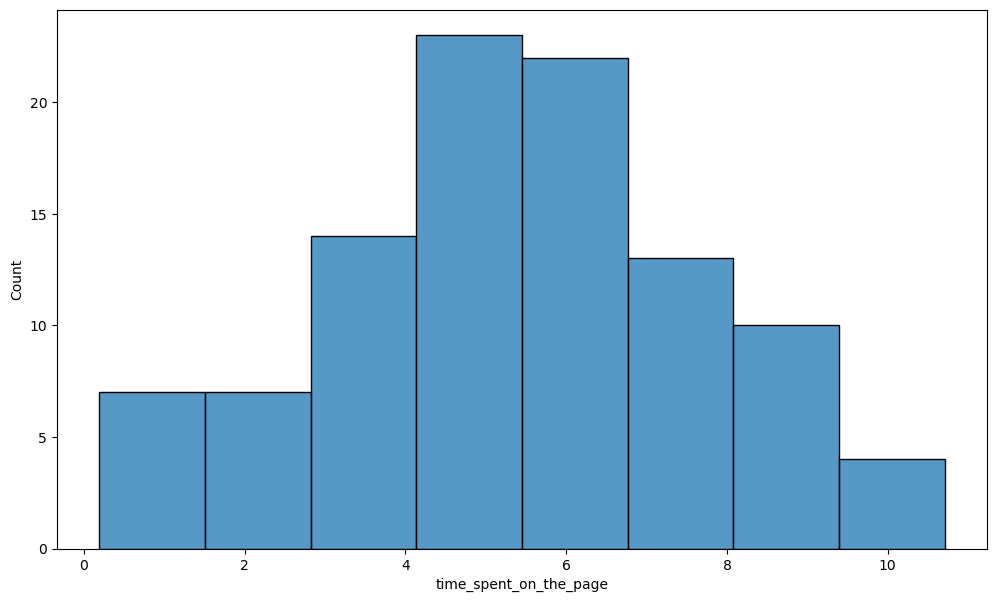

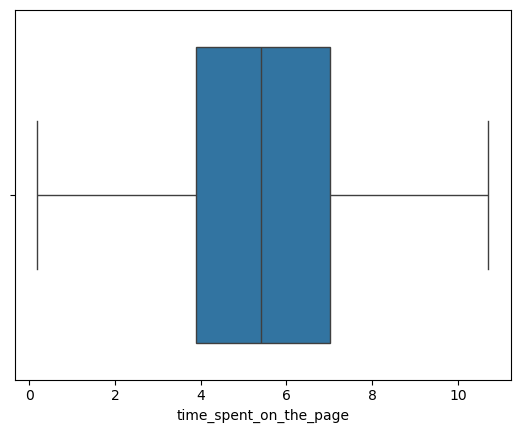

In [7]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

- *There are no outliners*
- *There is no skewness in data*

**Let's now explore the Categorical columns.**

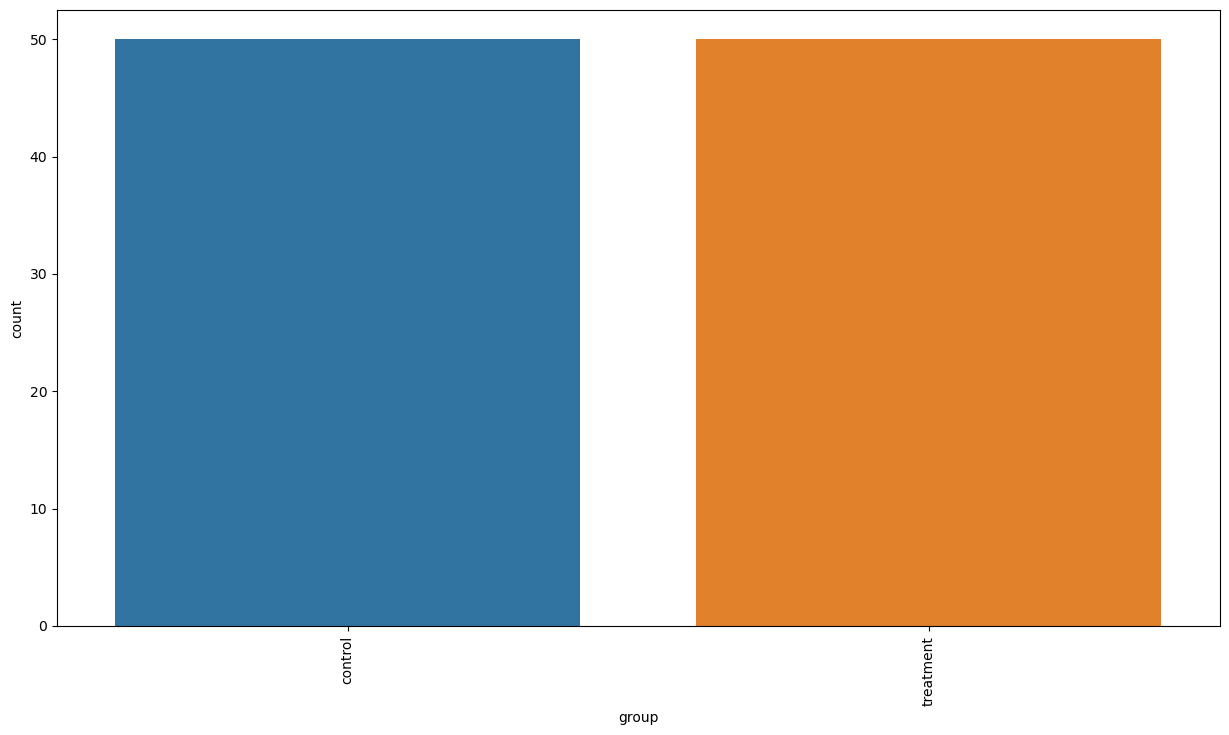

In [8]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='group', hue='group')
plt.xticks(rotation=90);

- *The ratio to control to treatment is same*

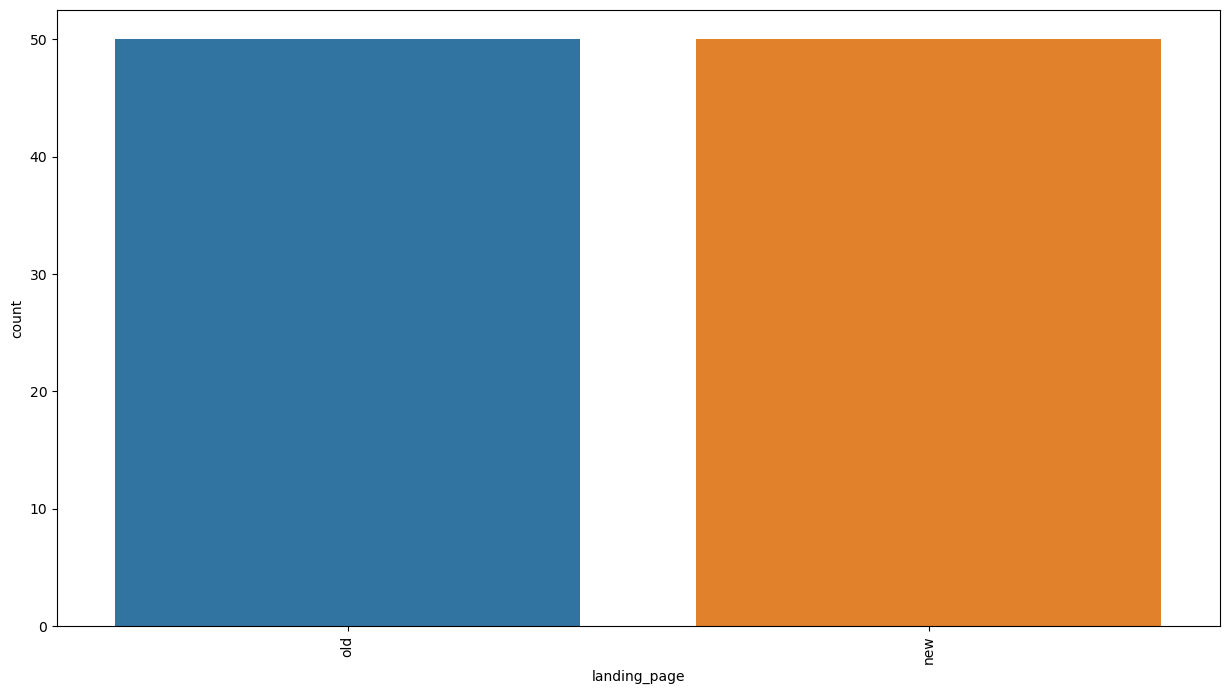

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='landing_page', hue='landing_page')
plt.xticks(rotation=90);

- *the ratio to old and new landing page is also same*

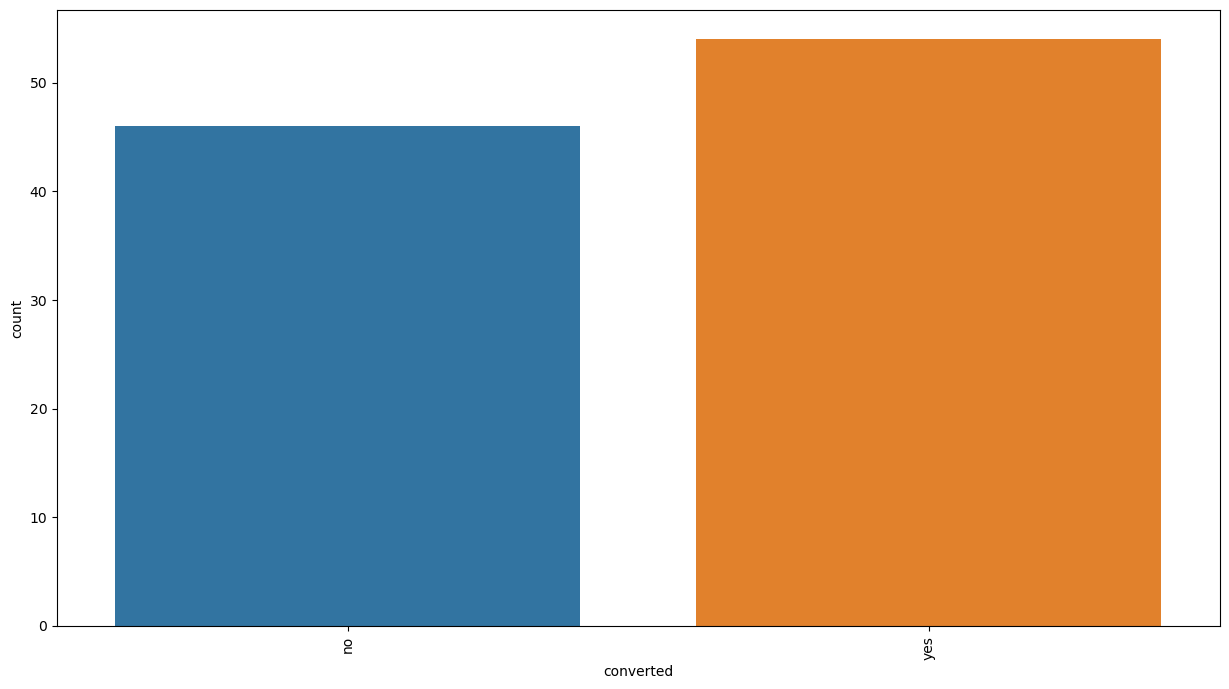

In [10]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='converted', hue='converted')
plt.xticks(rotation=90);

- *More users have been converted to a subscriber*

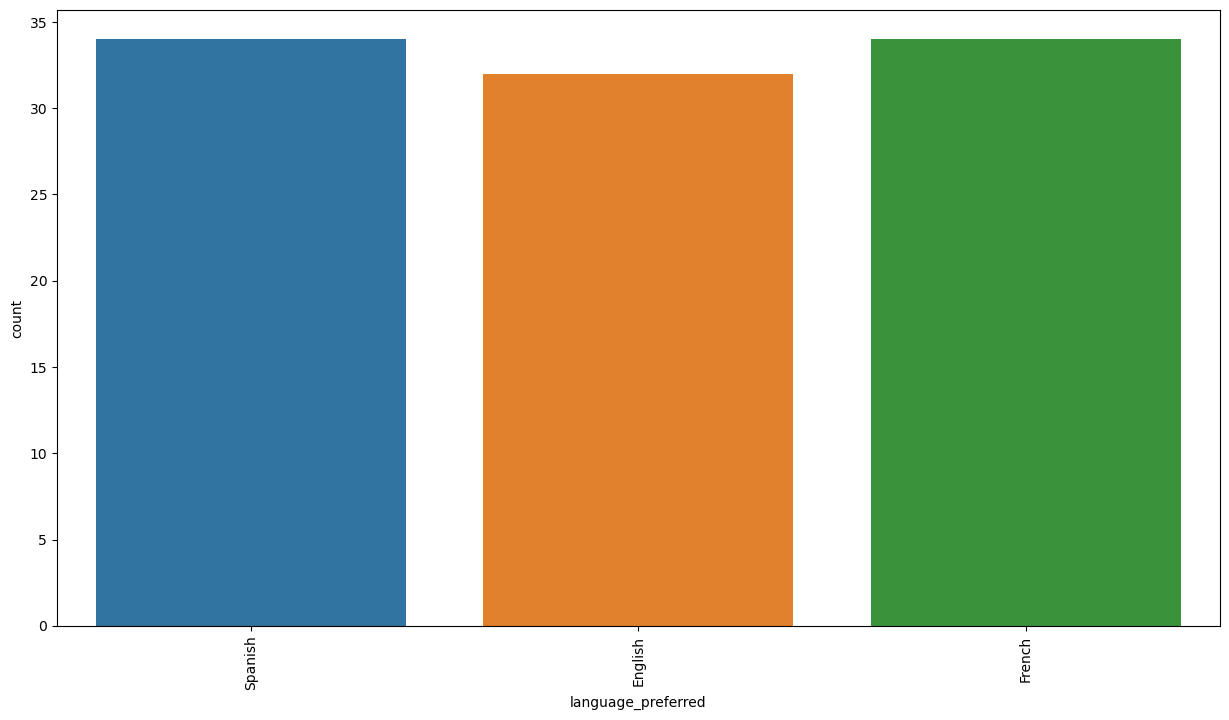

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='language_preferred', hue='language_preferred')
plt.xticks(rotation=90);

- *More users have visited Spanish and French Page instead of English*

### **Bivariate Analysis**

Let's check relationship of categories with Landing Page and Time Spent on each Page as to know which page user has spend more time

<Axes: xlabel='landing_page', ylabel='time_spent_on_the_page'>

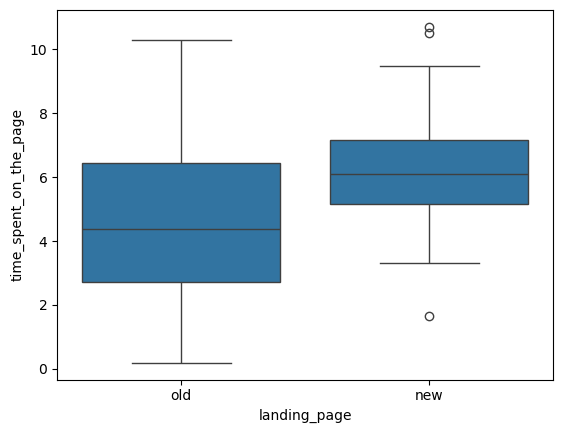

In [12]:
sns.boxplot(x="landing_page", y="time_spent_on_the_page", data=df)

array([<Axes: title={'center': 'new'}>, <Axes: title={'center': 'old'}>],
      dtype=object)

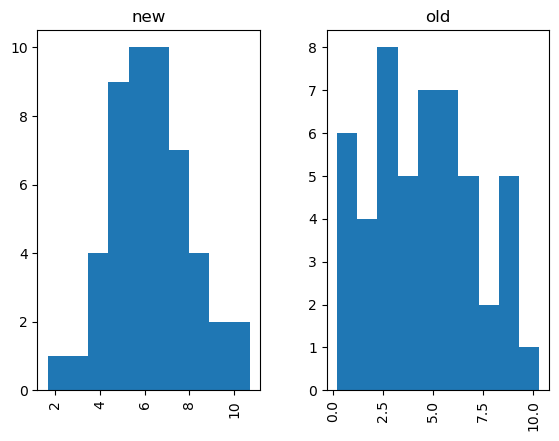

In [13]:
df.hist(by='landing_page',column = 'time_spent_on_the_page')

It seems users have spent more time in the New Landing Pages

#### **Observations on Convertion rate compared to time spend**

array([<Axes: title={'center': 'no'}>, <Axes: title={'center': 'yes'}>],
      dtype=object)

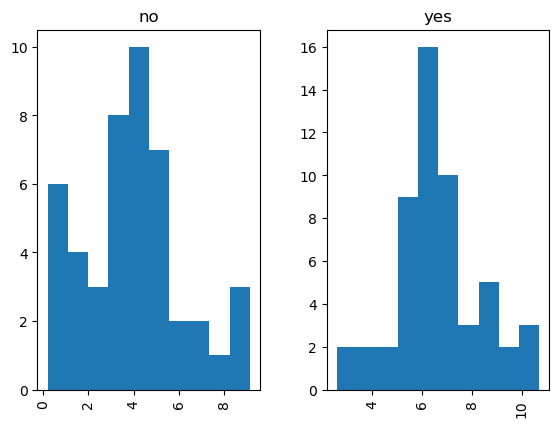

In [14]:
df.hist(by='converted',column = 'time_spent_on_the_page')

<Axes: xlabel='converted', ylabel='time_spent_on_the_page'>

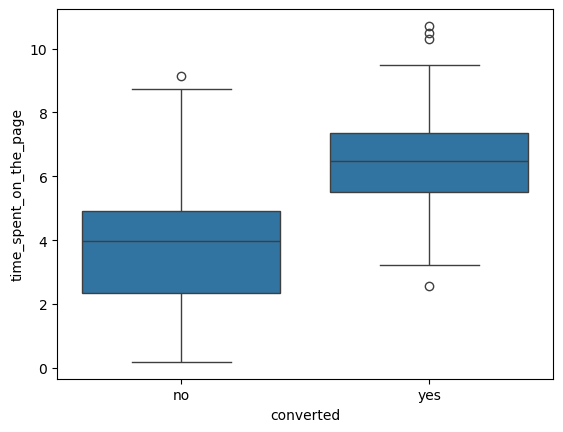

In [15]:
sns.boxplot(x="converted", y="time_spent_on_the_page", data=df)

- The more user has spent time on the new page, the more they have been converted as subscriber.
- There are more outliners for those who have converted.

Let's frame the null and alternative hypothesis based on the above claim can be formulated as:

> $H_0:$ There is no difference in the mean time spent on the old and new landing pages.

> $H_a:$ Users spend more time on the new landing page than on the old one.

The independent t-test (also called the two-sample t-test) is used to compare the means of two independent groups to determine if there is statistical evidence that the associated population means are significantly different.

In [16]:
# Library to help with statistical analysis
import scipy.stats as stats

Let's set the level of significane (alpha) as 0.05

In [17]:

# Splitting data into old and new landing pages
old_page = df[df['landing_page'] == 'old']['time_spent_on_the_page']
new_page = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# Check normality using Shapiro-Wilk test
shapiro_old = stats.shapiro(old_page)
shapiro_new = stats.shapiro(new_page)
print(f"Shapiro-Wilk test for old page: W={shapiro_old[0]:.4f}, p-value={shapiro_old[1]:.4f}")
print(f"Shapiro-Wilk test for new page: W={shapiro_new[0]:.4f}, p-value={shapiro_new[1]:.4f}")

# Check for equal variances using Levene's test
levene_test = stats.levene(old_page, new_page)
print(f"Levene's test: W={levene_test[0]:.4f}, p-value={levene_test[1]:.4f}")

# Perform the appropriate t-test
if shapiro_old[1] > 0.05 and shapiro_new[1] > 0.05:  # Normality assumption met
    if levene_test[1] > 0.05:  # Equal variances
        t_stat, p_value = stats.ttest_ind(new_page, old_page, alternative='greater')
        test_type = "Independent t-test"
    else:  # Unequal variances
        t_stat, p_value = stats.ttest_ind(new_page, old_page, equal_var=False, alternative='greater')
        test_type = "Welch’s t-test"
else:
    # If normality is not met, you might consider a non-parametric test (e.g., Mann-Whitney U test)
    t_stat, p_value = stats.mannwhitneyu(new_page, old_page, alternative='greater')
    test_type = "Mann-Whitney U test"

# Displaying the results
print(f"{test_type} results:")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")

# Checking if the p-value is less than the significance level (0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: Users spend more time on the new landing page than on the old one.")
else:
    print("Fail to reject the null hypothesis: No significant difference in time spent on the new and old landing pages.")


Shapiro-Wilk test for old page: W=0.9776, p-value=0.4561
Shapiro-Wilk test for new page: W=0.9858, p-value=0.8040
Levene's test: W=7.1137, p-value=0.0090
Welch’s t-test results:
t-statistic: 3.79
p-value: 0.0001
Reject the null hypothesis: Users spend more time on the new landing page than on the old one.


### **Conclusion:**
Based on the independent t-test conducted, we obtained a t-statistic of 3.79 and a p-value of 0.0001. Since the p-value is significantly less than our chosen significance level of 0.05, we reject the null hypothesis. This means that there is strong statistical evidence to conclude that users spend more time on the new landing page compared to the old one.

### **Business Implication:**
The analysis indicates that the new landing page is more effective in engaging users, leading them to spend more time on it. This increased user engagement can potentially lead to higher conversion rates and greater overall satisfaction. Therefore, it is recommended to implement the new landing page design across the platform to maximize user interaction and engagement.

#### **Observations on Convertion Rate compared to New and Old Page with respect to time spent**

#### **Observations on Convertion Rate based on the Old Landing Page**

<Axes: xlabel='converted', ylabel='count'>

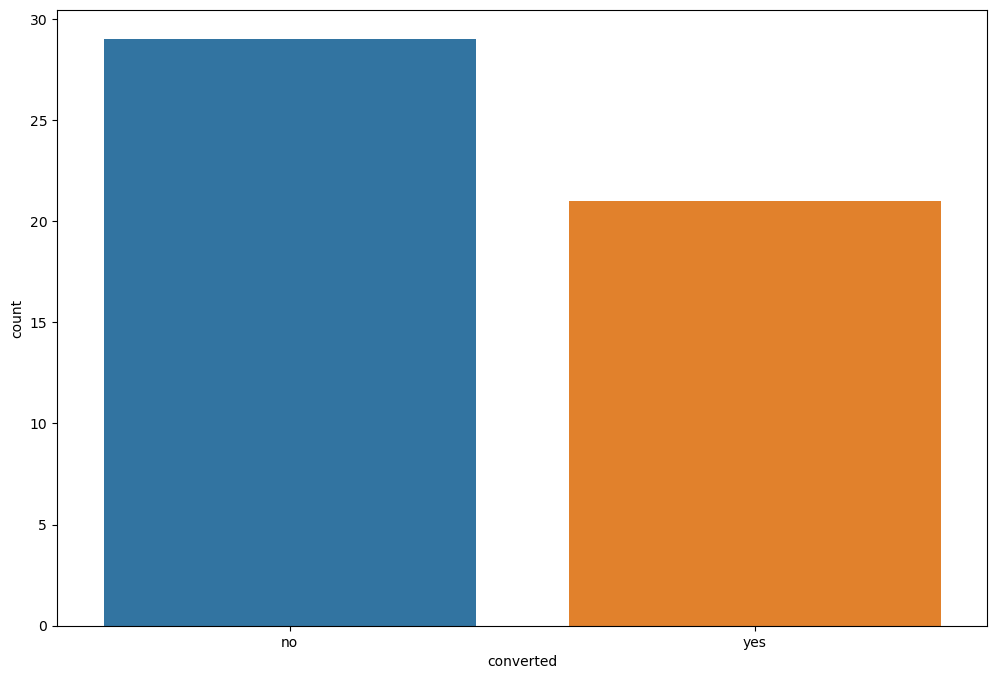

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(data=df[df['landing_page']=='old'], x='converted', hue='converted')

#### **Observations on Convertion Rate based on the New Landing Page**

<Axes: xlabel='converted', ylabel='count'>

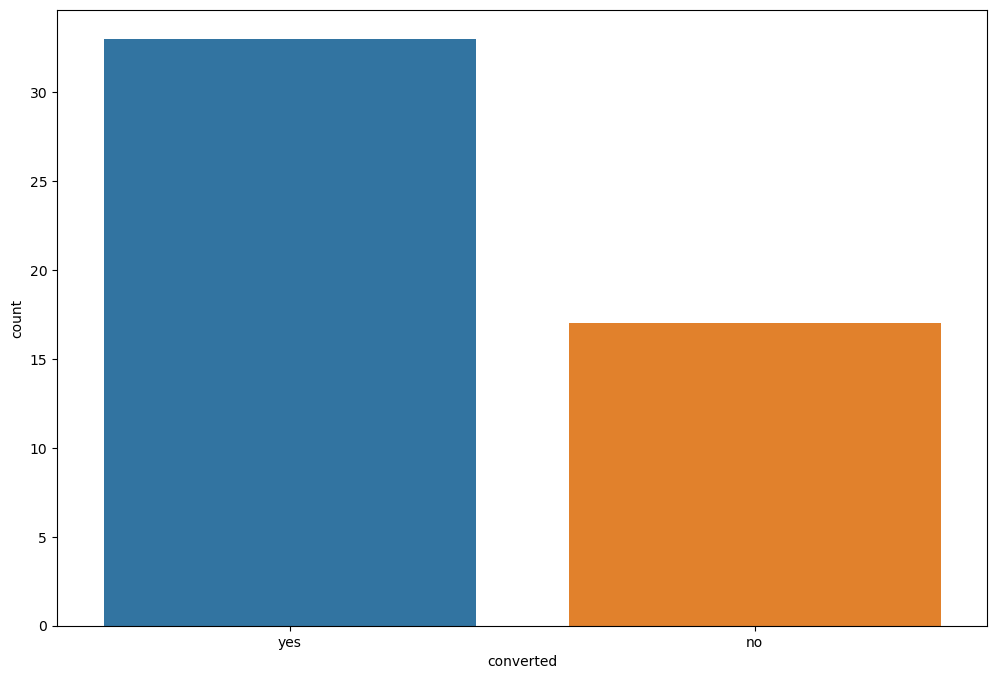

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(data=df[df['landing_page']=='new'], x='converted', hue='converted')

More users have been converted through the new landing page

#### **Observations on Convertion Rate with respect to Language**

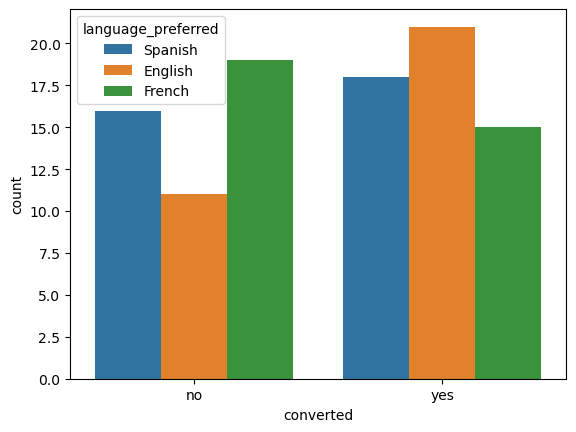

In [21]:
sns.countplot(x='converted', hue='language_preferred', data=df)
plt.show()

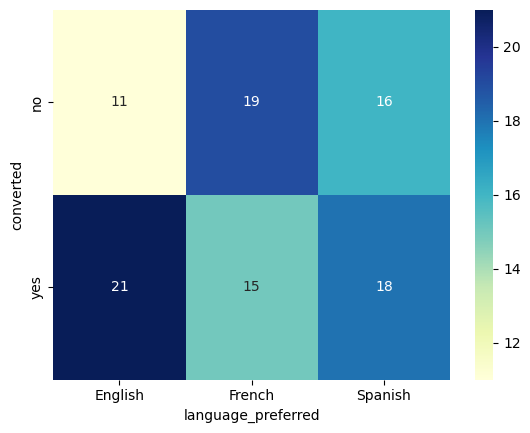

In [22]:
cross_tab = pd.crosstab(df['converted'], df['language_preferred'])
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.show()

- For French Landing Page the convertion rate is less
- For English Landing Page the convertion is more

#### **Observations on Convertion Rate with respect to Landing Page(Old or New)**

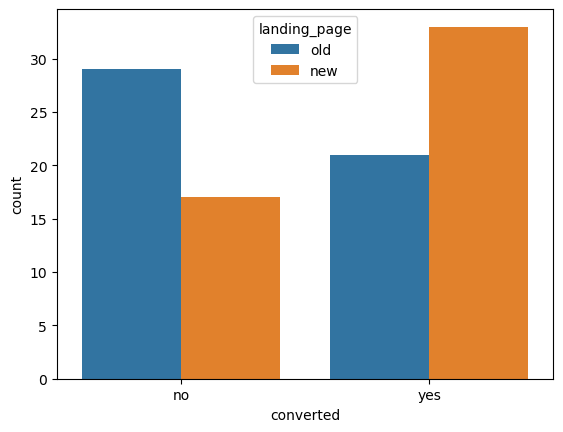

In [23]:
sns.countplot(x='converted', hue='landing_page', data=df)
plt.show()

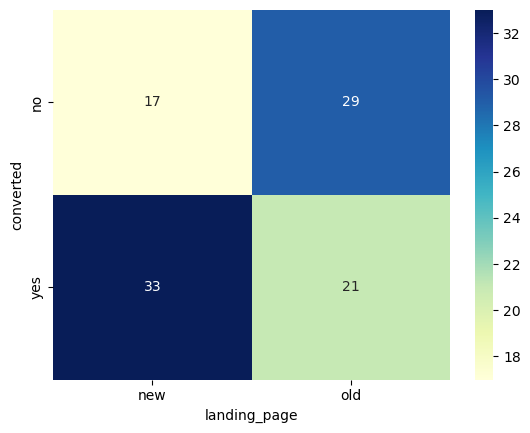

In [24]:
cross_tab = pd.crosstab(df['converted'], df['landing_page'])
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.show()

Let's frame the null and alternative hypothesis based on the above claim can be formulated as:

> $H_0:$ The conversion rate for the new page is less than or equal to the conversion rate for the old page.

> $H_a:$ The conversion rate for the new page is greater than the conversion rate for the old page.

Test to Use:
- Z-test for proportions (comparing two proportions).

In [19]:
from statsmodels.stats.proportion import proportions_ztest

In [20]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [22]:
# number of female smokers
old_landing = df[df['landing_page']=='old'].converted.value_counts()['yes']
# number of male smokers
new_landing = df[df['landing_page']=='new'].converted.value_counts()['yes']

print('The numbers of old and new page converted are {0} and {1} respectively'.format(old_landing, new_landing))

# number of females in the data
o_page = df.landing_page.value_counts()['old']

# number of males in the data
n_page = df.landing_page.value_counts()['new']

print('The total numbers of old and new page are {0} and {1} respectively'.format(o_page, n_page))

The numbers of old and new page converted are 21 and 33 respectively
The total numbers of old and new page are 50 and 50 respectively


In [23]:
print(f' The proportions of converted from old and new are {round(21/50,2)}, {round(33/50,2)} respectively')

 The proportions of converted from old and new are 0.42, 0.66 respectively


* The proportions in the sample are different. Let's conduct the test to see if this difference is significant.

In [24]:
# find the p-value using proportion_ztest
stat, pval = proportions_ztest([old_landing, new_landing] , [o_page, n_page], alternative = 'two-sided')

# print the p-value
print('The p-value is '+ str(pval))

The p-value is 0.016052616408112556


In [25]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


In [26]:

# Convert 'converted' column to binary (1 for 'yes', 0 for 'no')
df['converted_binary'] = df['converted'].apply(lambda x: 1 if x == 'yes' else 0)

# Subset data for control (old) and treatment (new) groups
control_converted = df[df['landing_page'] == 'old']['converted_binary']
treatment_converted = df[df['landing_page'] == 'new']['converted_binary']

# Perform Z-test for proportions
z_stat, p_value_z = proportions_ztest([control_converted.sum(), treatment_converted.sum()], 
                                            [len(control_converted), len(treatment_converted)], 
                                            alternative='larger')

# Displaying the results
print("Z-test for Proportions: Conversion Rate Comparison")
print(f"Z-statistic: {z_stat:.2f}")
print(f"p-value: {p_value_z:.4f}")

# Checking if the p-value is less than the significance level (0.05)
if p_value_z < 0.05:
    print("The conversion rate for the new page is less than or equal to the conversion rate for the old page.")
else:
    print("The conversion rate for the new page is greater than the conversion rate for the old page.")

print("\n")


Z-test for Proportions: Conversion Rate Comparison
Z-statistic: -2.41
p-value: 0.9920
The conversion rate for the new page is greater than the conversion rate for the old page.




### Inference based on the p-value: 

This suggests that the conversion rate for the new page is greater than the old page

### For the New Landing Page the Number of convertion is more also the number who was not converted is less compared to the Old Landing Page

<Axes: xlabel='language_preferred', ylabel='count'>

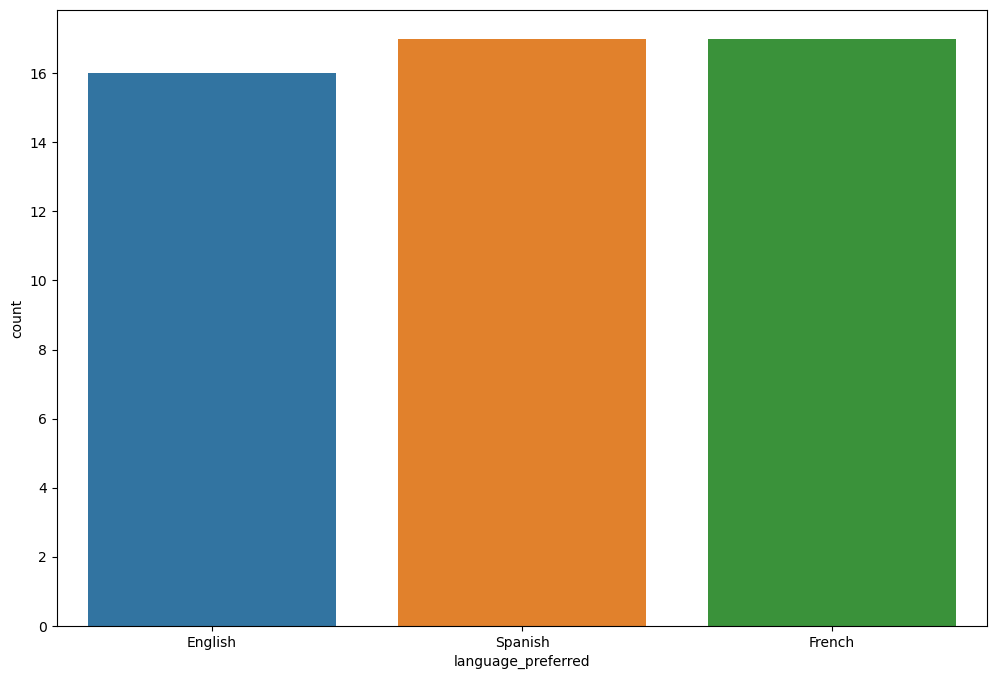

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(data=df[df['landing_page']=='new'], x='language_preferred', hue='language_preferred')

<Axes: xlabel='language_preferred', ylabel='count'>

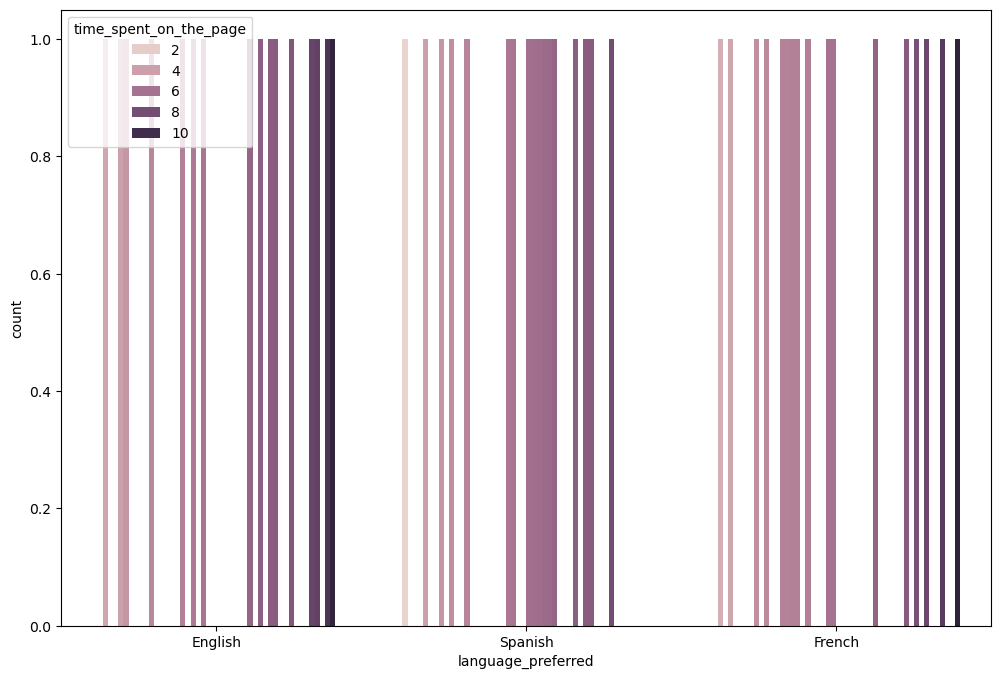

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(data=df[df['landing_page']=='new'], x='language_preferred', hue='time_spent_on_the_page')

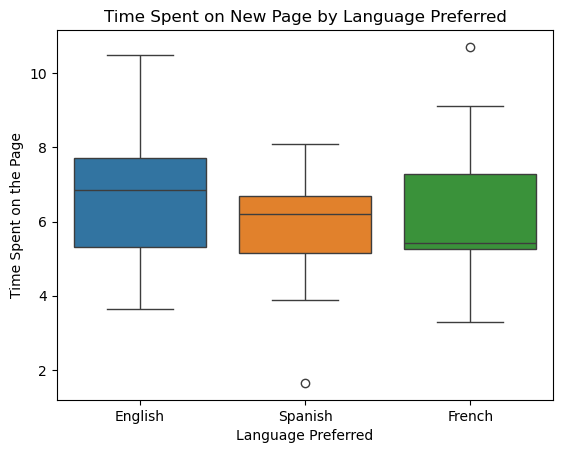

In [24]:
new_page_data = df[df['landing_page'] == 'new']

# Plot the time spent on the new page by language preferred
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=new_page_data, hue="language_preferred")
plt.title('Time Spent on New Page by Language Preferred')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on the Page')
plt.show()

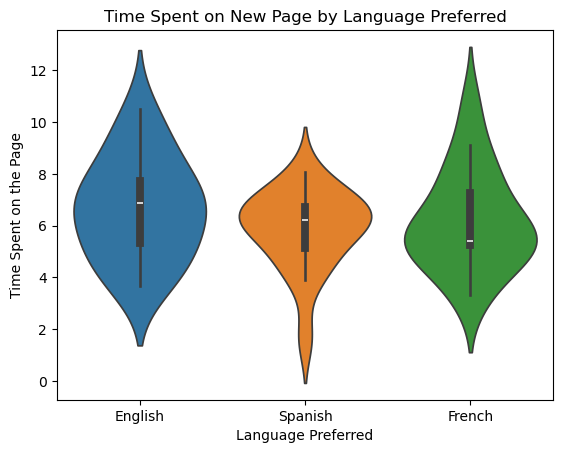

In [25]:
new_page_data = df[df['landing_page'] == 'new']

# Plot the violin plot
sns.violinplot(x='language_preferred', y='time_spent_on_the_page', data=new_page_data, hue="language_preferred")
plt.title('Time Spent on New Page by Language Preferred')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on the Page')
plt.show()

- As we see there are some outliners for the Spanish and French Landing Page with respect to time spent on the page
- Usually users send most time in the English Landing Page, followed by French then Spanish

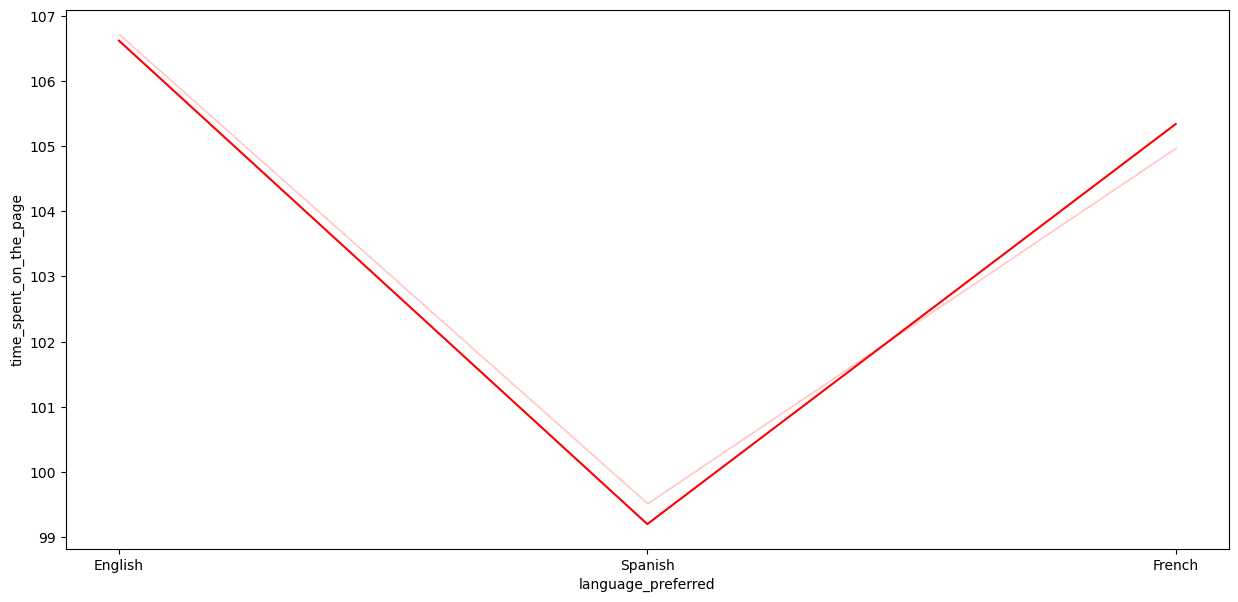

In [26]:
plt.figure(figsize=(15,7))
sns.lineplot(data=new_page_data, x="language_preferred", y="time_spent_on_the_page", errorbar=('ci', False), color="red", estimator='sum')
plt.ylabel('time_spent_on_the_page')
plt.xlabel('language_preferred')
plt.show()

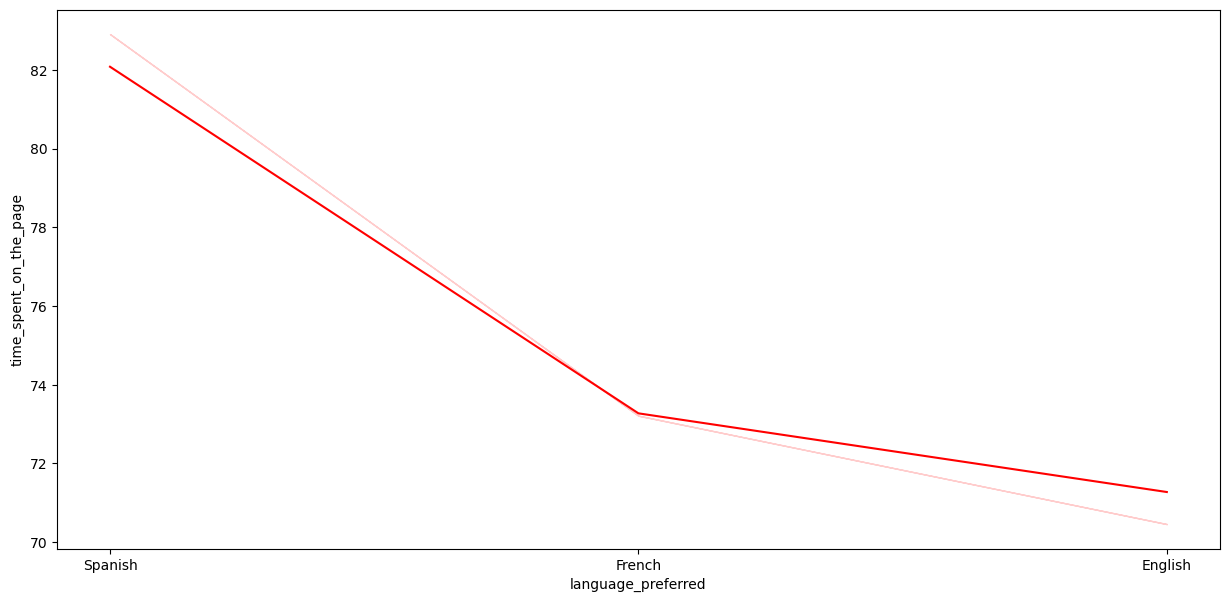

In [27]:
old_page_data = df[df['landing_page'] == 'old']

plt.figure(figsize=(15,7))
sns.lineplot(data=old_page_data, x="language_preferred", y="time_spent_on_the_page", errorbar=('ci', False), color="red", estimator='sum')
plt.ylabel('time_spent_on_the_page')
plt.xlabel('language_preferred')
plt.show()

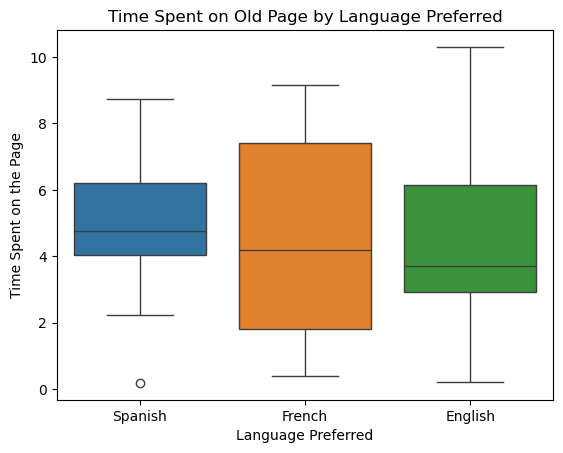

In [28]:
# Plot the time spent on the new page by language preferred
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=old_page_data, hue="language_preferred")
plt.title('Time Spent on Old Page by Language Preferred')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on the Page')
plt.show()

- Users have spent more Time in English and French in the new landing Page
- For old landing Pafge Users have more time in the Spanish Langugae Page

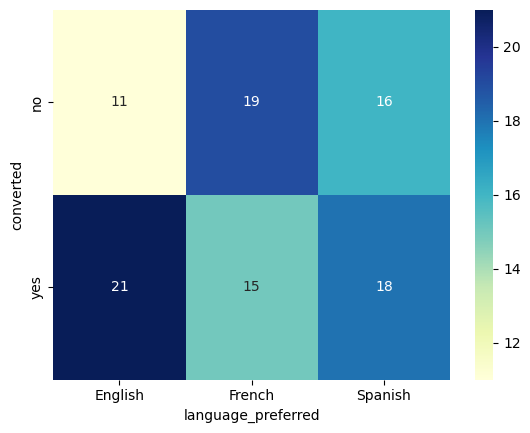

In [29]:
cross_tab = pd.crosstab(df['converted'], df['language_preferred'])
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.show()

- The cinvertion rate do depends on the language preferred
  

### Does the converted status depend on the preferred language?

> $H_0:$ The converted status is independent of the preferred language.

> $H_a:$ The converted status depends on the preferred language.

Test to Use:
- Chi-square test of independence.

In [106]:
# Create contingency table
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])

# Perform Chi-square test of independence
chi2, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

# Display results
print("Chi-square Test of Independence (Converted Status vs Preferred Language):")
print(f"Chi-square Statistic: {chi2:.2f}")
print(f"P-value: {p_value_chi2:.4f}")

# Check if the p-value is less than the significance level (0.05)
if p_value_chi2 < 0.05:
    print("Reject the null hypothesis: The converted status is independent of the preferred language.")
else:
    print("Fail to reject the null hypothesis: The converted status depends on the preferred language.")


Chi-square Test of Independence (Converted Status vs Preferred Language):
Chi-square Statistic: 3.09
P-value: 0.2130
Fail to reject the null hypothesis: The converted status depends on the preferred language.


### Interpretation:

The converted status do depends on the preferred language

### **Is the time spent on the new page the same for different language users?**

> $H_0:$ The mean time spent on the new landing page is the same across different language users.

> $H_a:$ The mean time spent on the new landing page differs across different language users.

Test to Use:
- One-way ANOVA 

In [107]:
new_page_data = df[df['landing_page'] == 'new']

# Perform one-way ANOVA
anova_result = stats.f_oneway(*[group['time_spent_on_the_page'] for name, group in new_page_data.groupby('language_preferred')])

# Displaying the results
print("One-way ANOVA: Time Spent on New Page across Language Users")
print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"p-value: {anova_result.pvalue:.4f}")

# Checking if the p-value is less than the significance level (0.05)
if anova_result.pvalue < 0.05:
    print("   Reject the null hypothesis: The mean time spent on the new landing page is the same across different language users.")
else:
    print("   Fail to reject the null hypothesis: The mean time spent on the new landing page differs across different language users.")

One-way ANOVA: Time Spent on New Page across Language Users
F-statistic: 0.85
p-value: 0.4320
   Fail to reject the null hypothesis: The mean time spent on the new landing page differs across different language users.


### **Actionable Insights and Recommendations**

#### **Insights**

We analyzed a dataset of nearl100 Users who have visitied the Landing Pagess.
Thesign team has created a new landing page. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group).15.
The main feature of interest hereif the user has spend more time on the Landing Pages and if they are convertedpect.

We have been able to conclude that -Users spend more time in the new Landing Page than the old landing pages NewMore users are converted from the New Landing Pageer pickuconvertion rate do depends on the Preferred Languagean toime spend the new page is different for diiferent langugae users.Ue data to uncover more insights

#### **Recommendations to business**

1. It is better to use the new landing page as this has a more convertion rate 
2. Since the convertion rate is high for English preferred landing pages, it might be conveniet to use the English Landing Page with options to change language on the landing page. 



####  **Conclusion**

The New Landing Page has converted more users than the Old Landing Pages.